## **Model comparison and Final Thoughts**

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
from pathlib import Path
import pandas as pd

# Ensure you have created a "data" folder in your project directory 
# and downloaded the CSV file inside it.
file_path = Path.cwd().parent / "data" / "athens_weather_df_2019_2023.csv"

# Load dataset with index and date parsing
lagged_1h_df = pd.read_csv(file_path, parse_dates=["date"])

In [8]:
X = lagged_1h_df.drop(columns=['date', 'weather_event'])
y = lagged_1h_df['weather_event']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### **Load All Model Reports for Final Comparison & Evaluation**

In [10]:
from joblib import load

# Define report file paths
report_paths = {
    "Standard Logistic Regression": "../reports/03_standard_logistic_regression_report.joblib",
    "Weighted Logistic Regression": "../reports/04_weighted_logistic_regression_report.joblib",
    "SMOTE Logistic Regression": "../reports/05_smote_logistic_regression_report.joblib",
    "OvR Logistic Regression": "../reports/06_ovr_logistic_regression_report.joblib",
    "Bayes Optimized Logistic Regression": "../reports/07_bayes_logistic_regression_report.joblib"
}

# Load reports into a dictionary
loaded_reports = {}
for model_name, path in report_paths.items():
    loaded_reports[model_name] = load(path)

print("All model reports loaded successfully!")

All model reports loaded successfully!


In [11]:
print(loaded_reports.keys())

dict_keys(['Standard Logistic Regression', 'Weighted Logistic Regression', 'SMOTE Logistic Regression', 'OvR Logistic Regression', 'Bayes Optimized Logistic Regression'])


In [12]:
import pandas as pd
from joblib import load


# Load reports into a dictionary
loaded_reports = {name: load(path) for name, path in report_paths.items()}

# Concatenate reports efficiently
comparison_df = pd.concat(loaded_reports.values(), axis=0)
comparison_df.index = loaded_reports.keys()

comparison_df.T

,Standard Logistic Regression,Weighted Logistic Regression,SMOTE Logistic Regression,OvR Logistic Regression,Bayes Optimized Logistic Regression
precision_0,0.9497,0.9909,0.9906,0.9908,0.9908
recall_0,0.9823,0.8422,0.8517,0.8409,0.8419
f1_0,0.9657,0.9105,0.9159,0.9097,0.9103
pr_auc_0,0.9949,0.9947,0.9948,0.9948,0.9948
precision_rain,0.6879,0.3539,0.3660,0.3516,0.3530
recall_rain,0.4397,0.9066,0.9048,0.9084,0.9093
f1_rain,0.5365,0.5090,0.5211,0.5070,0.5086
pr_auc_rain,0.6419,0.6167,0.6235,0.6098,0.6125
precision_snow,1.0000,0.1782,0.2222,0.1868,0.1932
recall_snow,0.2105,0.9474,0.9474,0.8947,0.8947


With the exception of the baseline model, all other models demonstrate similar performance across all metrics. Differences are marginal and, in many cases, only noticeable at the third or fourth decimal place.

A practical and effective way to compare model performance across iterations is to visualize all confusion matrices side by side, allowing for a direct comparison of True Positives (TPs), False Positives (FPs), and meaningful insights model by model

- **Assessing Model Performance Using the Confusion matrices**

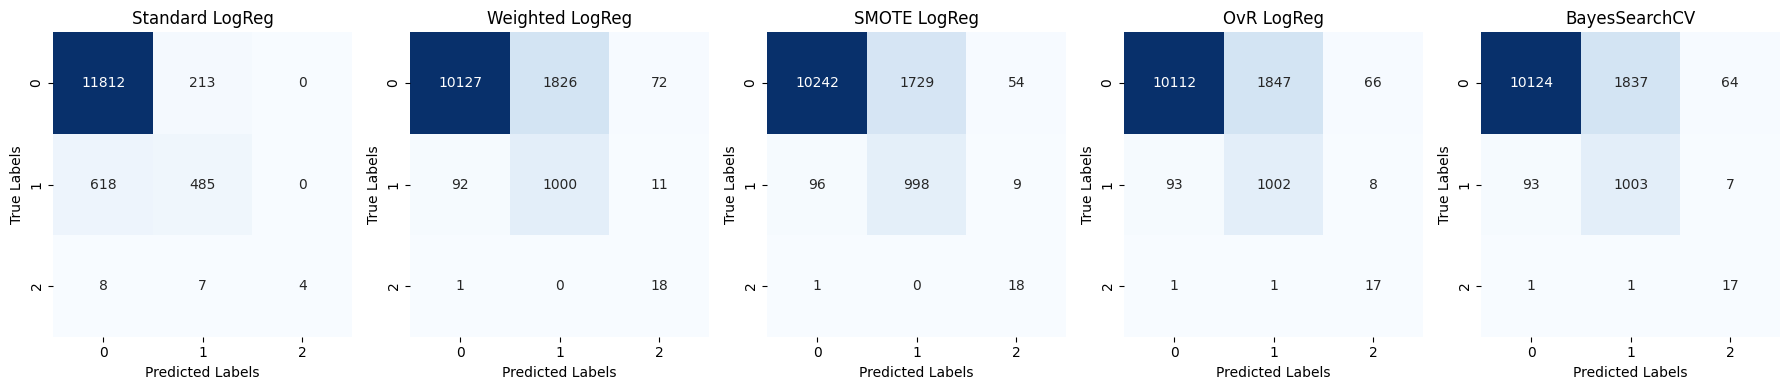

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load

# Define paths for saved confusion matrices
conf_matrix_paths = {
    "Standard LogReg": "../reports/03_standard_logistic_regression_confusion_matrix.joblib",
    "Weighted LogReg": "../reports/04_weighted_logistic_regression_confusion_matrix.joblib",
    "SMOTE LogReg": "../reports/05_smote_logistic_regression_confusion_matrix.joblib",
    "OvR LogReg": "../reports/06_ovr_logistic_regression_confusion_matrix.joblib",
    "BayesSearchCV": "../reports/07_bayes_logistic_regression_confusion_matrix.joblib"
}

# Load confusion matrices
loaded_conf_matrices = {name: load(path) for name, path in conf_matrix_paths.items()}

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, len(loaded_conf_matrices), figsize=(18, 4))

for ax, (name, conf_matrix) in zip(axes, loaded_conf_matrices.items()):
    heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    title = ax.set_title(name)
    xlabel = ax.set_xlabel('Predicted Labels')
    ylabel = ax.set_ylabel('True Labels')

plt.tight_layout()
plt.show()

The confusion matrices highlight a persistent trade-off between precision and recall across all logistic regression iterations, emphasizing the challenges posed by severe class imbalance. While approaches such as class weighting, SMOTE oversampling, OvR, and Bayesian optimization provided some improvements over the baseline, none significantly enhanced minority class detection without increasing false positives.

While all models helped increase the model’s sensitivity to minority classes, they did so at the cost of introducing more misclassifications in the majority class. Despite hyperparameter tuning (BayesSearchCV), the model’s fundamental limitations remained, suggesting that logistic regression, as a linear model, lacks the flexibility to fully capture the complexities of this dataset.
A key takeaway from the learning curves is that adding more data would likely not improve model performance.

These findings strongly suggest that further improvements using Logistic Regression alone are highly unlikely.
This could be due to several factors:
- **Complex, potentially non-linear relationships among the predictors that Logistic Regression alone fails to capture.**
- **Severe class imbalance, remained a challenge despite multiple balancing techniques.**
- **The algorithm may have reached its full potential given the constraints of this dataset.**

### **Final Thoughts**

In real-world machine learning projects, the goal is often to derive actionable insights, make data-driven recommendations, or deploy models for real-world applications.

However, the primary objective of this project was to explore and practice various classification techniques, **specifically Logistic Regression**, while examining its effectiveness in handling heavily imbalanced datasets. Class imbalance is a common challenge in real-world scenarios, making it a crucial aspect to study when developing classification models.

For this reason, feature importance was not extracted in any iteration, as it falls outside the scope of this exploration. Instead, the focus was on understanding model behavior, diagnosing performance limitations, and experimenting with techniques to enhance classification performance under challenging conditions rather than deriving domain-specific insights.

This notebook serves as a valuable exercise in assessing the strengths and limitations of Logistic Regression for imbalanced classification problems, paving the way for more advanced modeling approaches in future projects.

I hope you find this notebook helpful.